In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/abc/Desktop/Phishing_Legitimate_full.csv")

In [3]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
data.shape

(10000, 50)

In [5]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [6]:
data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [8]:
data.nunique()

id                                    10000
NumDots                                  17
SubdomainLevel                           13
PathLevel                                18
UrlLength                               226
NumDash                                  25
NumDashInHostname                        10
AtSymbol                                  2
TildeSymbol                               2
NumUnderscore                            16
NumPercent                               14
NumQueryComponents                       19
NumAmpersand                             16
NumHash                                   2
NumNumericChars                          82
NoHttps                                   2
RandomString                              2
IpAddress                                 2
DomainInSubdomains                        2
DomainInPaths                             2
HttpsInHostname                           1
HostnameLength                           74
PathLength                      

In [9]:
data=data.drop(["id","HttpsInHostname"],axis=1)


In [10]:
data.rename(columns={"CLASS_LABEL":"labels"}, inplace=True)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


In [12]:
data['labels'].value_counts()

1    5000
0    5000
Name: labels, dtype: int64

<AxesSubplot:>

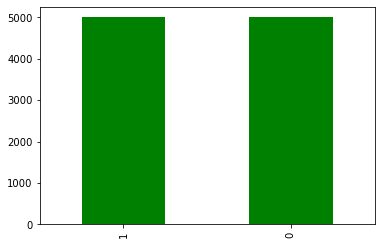

In [13]:
data['labels'].value_counts().plot(kind='bar', color="green")

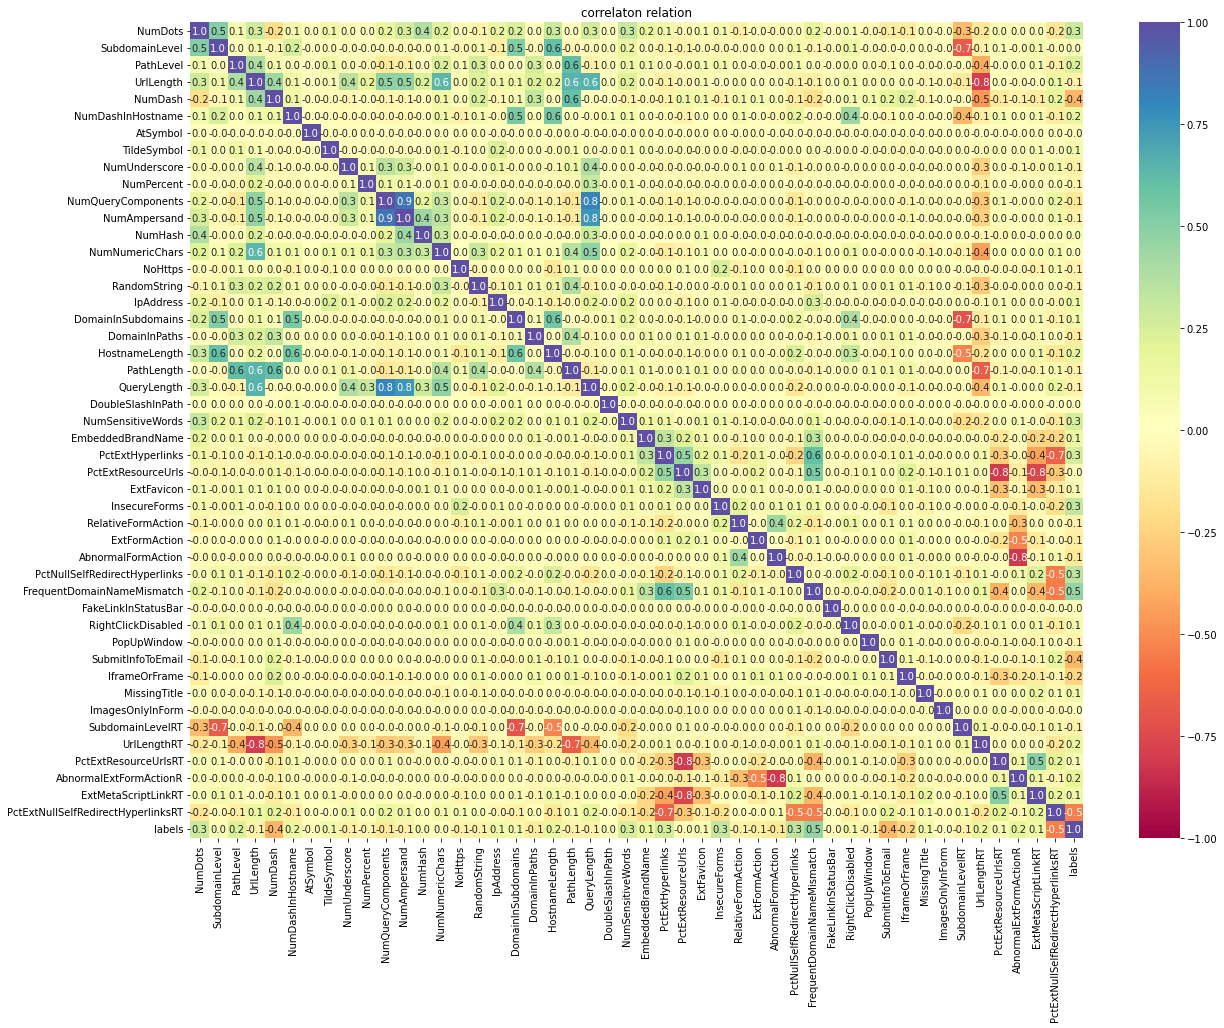

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral")
plt.title("Correlaton Analysis")
plt.show()

In [15]:
def corr_heatmap(data, column_start, column_end):
    
    y = data['labels']
   
    subset = data.iloc[:, column_start : column_end]
   
    subset['labels'] = y
    
    plt.figure(figsize=(13,7))
    sns.heatmap(subset.corr(), annot=True, fmt='.2f', cmap="Spectral")
    plt.show()

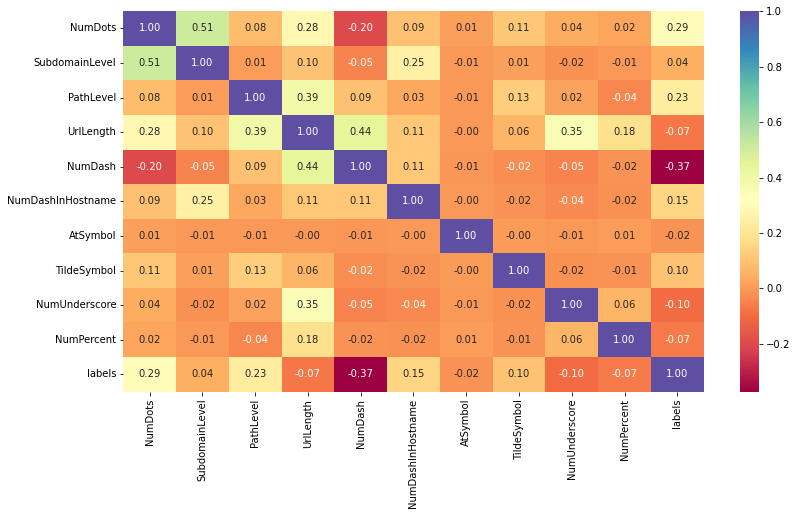

In [16]:
corr_heatmap(data, 0, 10)

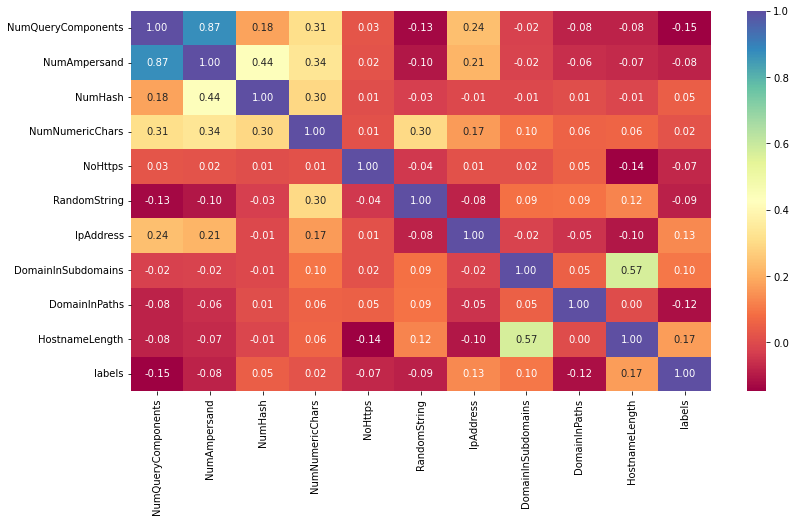

In [17]:
corr_heatmap(data, 10, 20)

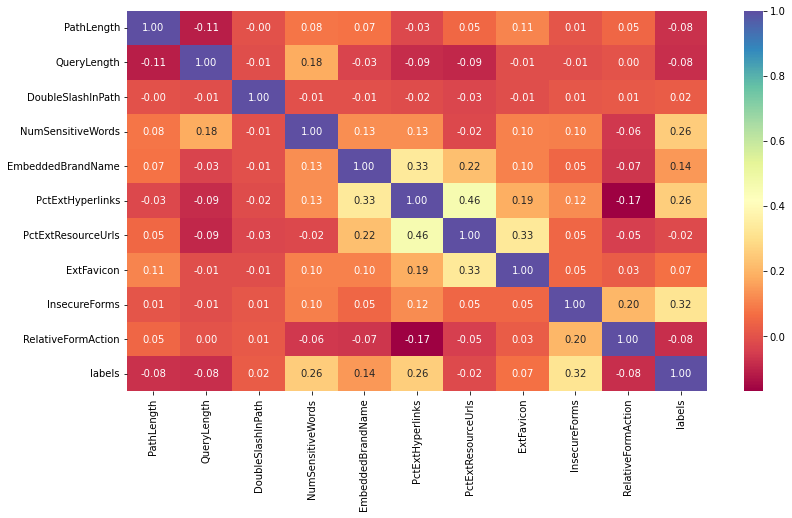

In [18]:
corr_heatmap(data, 20, 30)

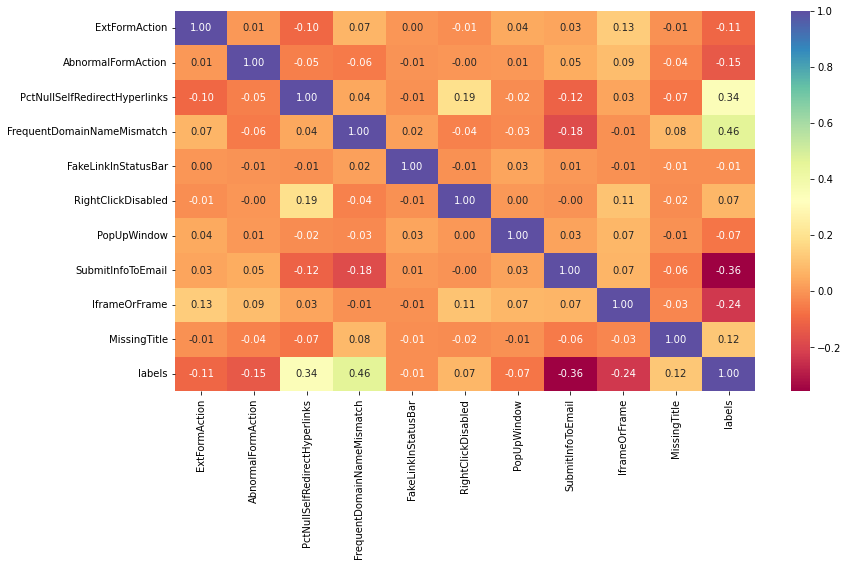

In [19]:
corr_heatmap(data, 30, 40)

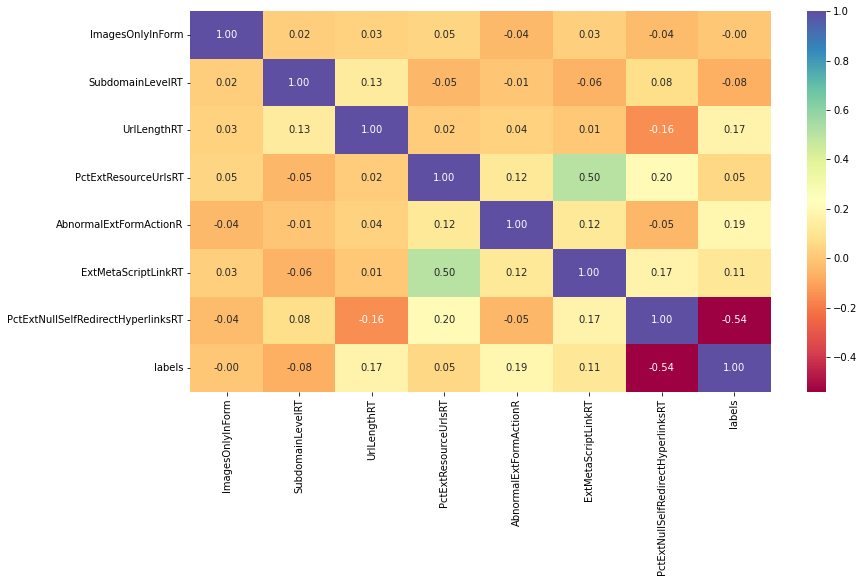

In [20]:
corr_heatmap(data, 40, 50)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [22]:
x = data.drop(columns=['labels'], axis=1)
y = data['labels']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state= 1)

In [24]:
X_train.shape

(7000, 47)

In [25]:
X_test.shape

(3000, 47)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=150000)

In [27]:
LR.fit(X_train, Y_train)

Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

In [28]:
train_accuracy_LR = (accuracy_score(Y_pred_train, Y_train))*100
print("Accuracy on training data Logistic Regression: %.2f" % train_accuracy_LR , "%")

test_accuracy_LR = (accuracy_score(Y_pred_test, Y_test))*100
print("Accuracy on testing data Logistic Regression: %.2f" % test_accuracy_LR , "%")

Accuracy on training data Logistic Regression: 94.14 %
Accuracy on testing data Logistic Regression: 94.97 %


In [29]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1500
           1       0.94      0.96      0.95      1500

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [30]:
confusion_matrix(Y_test, Y_pred_test)

array([[1415,   85],
       [  66, 1434]], dtype=int64)

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [32]:
rfc.fit(X_train, Y_train)

Y_pred_train=rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

In [33]:
train_accuracy_RFC = (accuracy_score(Y_pred_train, Y_train))*100
print("Accuracy on training data Random Forest Classifier:%2.f " % train_accuracy_RFC ,"%")

test_accuracy_RFC = (accuracy_score(Y_pred_test, Y_test))*100
print("Accuracy on testing data Random Forest Classifier: %.2f " % test_accuracy_RFC ,"%")

Accuracy on training data Random Forest Classifier:100  %
Accuracy on testing data Random Forest Classifier: 98.33  %


In [34]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1500
           1       0.98      0.99      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [35]:
confusion_matrix(Y_test, Y_pred_test)

array([[1472,   28],
       [  22, 1478]], dtype=int64)

# KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k_near = KNeighborsClassifier(n_neighbors=1)

In [37]:
k_near.fit(X_train,Y_train)

Y_pre_test = k_near.predict(X_test)
Y_pre_train = k_near.predict(X_train)

In [38]:
train_accuracy_KNN = (accuracy_score(Y_pre_train, Y_train))*100
print('Accuracy for train dataset for K-neariest :%2.f '% train_accuracy_KNN , '%')

test_accuracy_KNN = (accuracy_score(Y_pre_test, Y_test))*100
print('Accuracy for test dataset for K-neariest :%2.f '% test_accuracy_KNN , '%')

Accuracy for train dataset for K-neariest :100  %
Accuracy for test dataset for K-neariest :86  %


In [39]:
print(classification_report(Y_test, Y_pre_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1500
           1       0.85      0.88      0.86      1500

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [40]:
confusion_matrix(Y_test, Y_pre_test)

array([[1258,  242],
       [ 174, 1326]], dtype=int64)

# XGboost

In [41]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=1000)

In [42]:
xgb.fit(X_train,Y_train)

Y_pre_test = xgb.predict(X_test)
Y_pre_train = xgb.predict(X_train)

In [43]:
train_accuracy_XGB = (accuracy_score(Y_pre_train, Y_train))*100
print('Accuracy for train dataset for XGBoost Classifier :%2.f '% train_accuracy_XGB,'%')

test_accuracy_XGB = (accuracy_score(Y_pre_test, Y_test))*100
print('Accuracy for test dataset for XGBoost Classifier :%2.f '% test_accuracy_XGB,'%')

Accuracy for train dataset for XGBoost Classifier :100  %
Accuracy for test dataset for XGBoost Classifier :99  %


In [44]:
print(classification_report(Y_test, Y_pre_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.99      0.99      0.99      1500

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [45]:
confusion_matrix(Y_test, Y_pre_test)

array([[1479,   21],
       [  15, 1485]], dtype=int64)

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [47]:
gnb.fit(X_train,Y_train)

Y_pre_test = gnb.predict(X_test)
Y_pre_train = gnb.predict(X_train)

In [48]:
train_accuracy_NB = (accuracy_score(Y_pre_train, Y_train))*100
print('Accuracy for train dataset for Naive Bayes : %.2f ' % train_accuracy_NB ,'%')

test_accuracy_NB = (accuracy_score(Y_pre_test, Y_test))*100
print('Accuracy for test dataset for Naive Bayes : %.2f ' % test_accuracy_NB ,'%')

Accuracy for train dataset for Naive Bayes : 84.91  %
Accuracy for test dataset for Naive Bayes : 84.43  %


In [49]:
print(classification_report(Y_test, Y_pre_test))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1500
           1       0.93      0.74      0.83      1500

    accuracy                           0.84      3000
   macro avg       0.86      0.84      0.84      3000
weighted avg       0.86      0.84      0.84      3000



In [50]:
confusion_matrix(Y_test, Y_pre_test)

array([[1422,   78],
       [ 389, 1111]], dtype=int64)

# Accuracy Score Comparision

In [51]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','KNN','XGBoost','Naive Bayes', ],
    'Train Accuracy': [train_accuracy_LR, train_accuracy_RFC, train_accuracy_KNN, train_accuracy_XGB, train_accuracy_NB],
    'Test Accuracy': [test_accuracy_LR, test_accuracy_RFC, test_accuracy_KNN, test_accuracy_XGB, test_accuracy_NB]})
result_df = results.sort_values(by='Test Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train Accuracy,Test Accuracy
Model,,
XGBoost,100.000000,98.800000
Random Forest,100.000000,98.333333
Logistic Regression,94.142857,94.966667
KNN,100.000000,86.133333
Naive Bayes,84.914286,84.433333


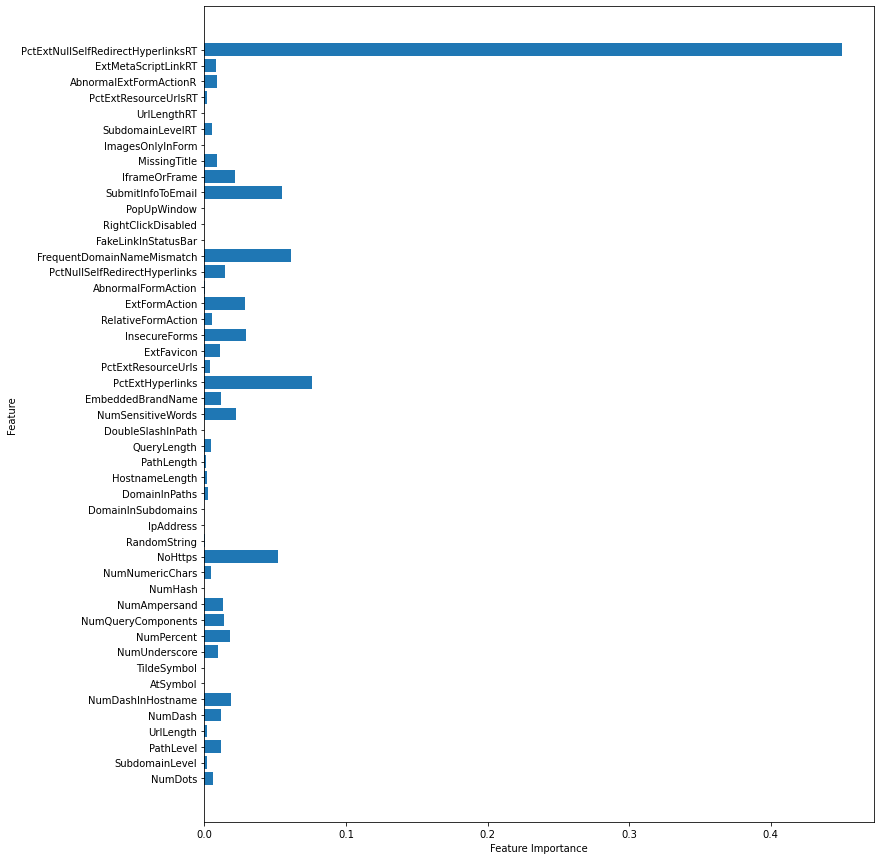

In [52]:
##features importance for best model i.e. XGBoost Clasifier

plt.figure(figsize=(12,15))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()